<a href="https://colab.research.google.com/github/ducnghich/Phython/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/ducnghich/Phython/main/Pokemon.csv")
#dimension of the data 
print('THe dimensiuons of the data are: ', df.shape)


df.head()

THe dimensiuons of the data are:  (1072, 13)


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
#check for empty data 
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [5]:
#check how many unique values 
df.nunique()

number         898
name          1072
type1           20
type2           18
total          219
hp             103
attack         123
defense        114
sp_attack      119
sp_defense     107
speed          127
generation       9
legendary        2
dtype: int64

In [6]:
# drop totals since it doesnt have to do w anything 
df = df.drop(['total'],axis = 1)

#check type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 93.3+ KB


In [7]:
#Looking into staticstics 
df.describe()

,number,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


In [8]:
print(df['type1'].value_counts())

Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Poison        42
Ground        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Graass         1
Name: type1, dtype: int64


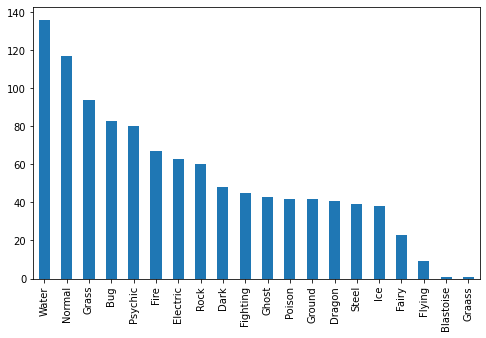

In [10]:
#Plot out primary type of pokemon
plt.figure(figsize=(8,5))
df['type1'].value_counts().plot(kind='bar',fontsize = 10)
#found out there is 2 wrong type blastouse and graass 

<function matplotlib.pyplot.show>

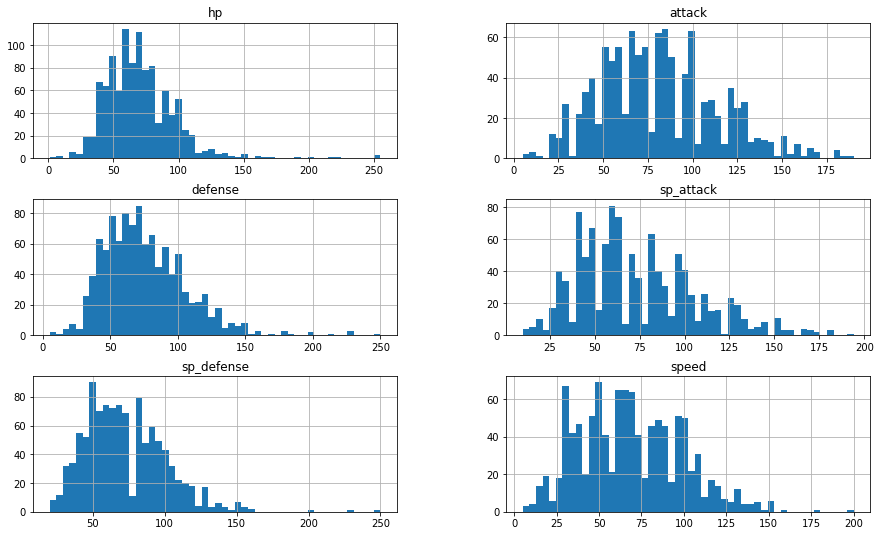

In [12]:
#drop other data type and keep numerical 
df_num = df.drop(['type1','type2','number','legendary','generation'],axis=1)

df_num.hist(bins=50,figsize=(15,9))
plt.show

<h1>hp and defense doesnt affect attack much, but they do have effect in speed </h1>

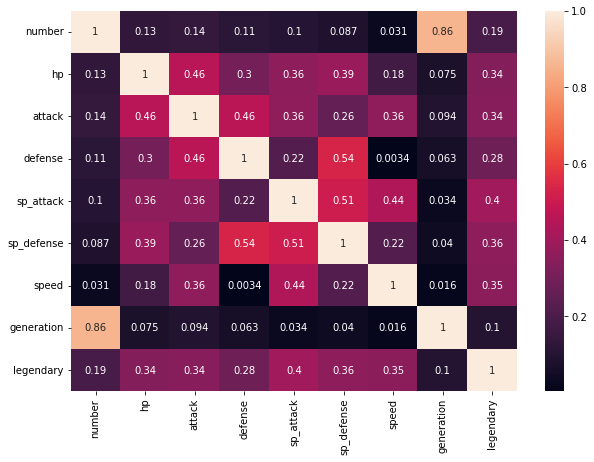

In [15]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
corrMatrix["hp"].sort_values(ascending=False)

hp            1.000000
attack        0.455366
sp_defense    0.388298
sp_attack     0.361150
legendary     0.335003
defense       0.302501
speed         0.176025
number        0.131839
generation    0.074719
Name: hp, dtype: float64

No handles with labels found to put in legend.


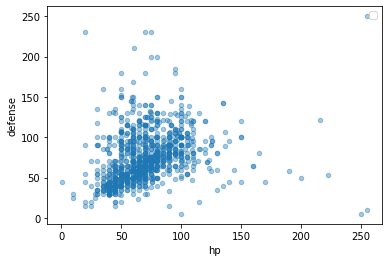

In [18]:
df.plot(kind='scatter',x="hp",y="defense", alpha=0.4,
        )
plt.legend()